In [31]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel('attaccanti_23.xlsx')

Questa è lista completa dei difensori che erano iscritti al campionato di Serie A del 2019 con le rispettive statistiche legate alla loro anagrafe e alle loro prestazioni sul rettangolo di gioco. Tramite questi dati è stato possibile effettuare un'analisi approfondita dei calciatori.

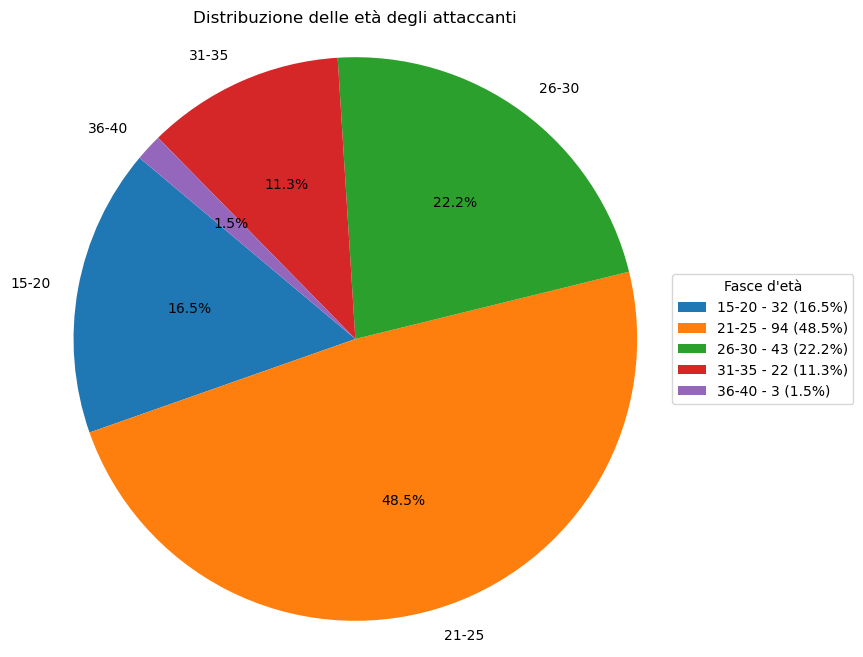

In [32]:
#diagramma a torta

# Estrai le età dalla colonna 'Age'
eta = data['Age']

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Categorizza le età nelle fasce specificate
eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

# Conta il numero di difensori in ciascuna fascia
eta_counts = eta_bins.value_counts().sort_index()

# Crea una figura e un oggetto ax
fig, ax = plt.subplots(figsize=(8, 8))

# Crea il diagramma a torta sull'oggetto ax
ax.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)

# Imposta il titolo e assicura che il grafico sia circolare
ax.set_title('Distribuzione delle età degli attaccanti')

ax.axis('equal')  # Per rendere il diagramma a torta circolare

# Aggiungi la legenda con i valori percentuali

ax.legend([f"{label} - {int(count)} ({pct:.1f}%)" for label, count, 
           pct in zip(eta_counts.index, eta_counts, 100*eta_counts/eta_counts.sum())], title="Fasce d'età", loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1))

# Mostra il diagramma a torta
plt.show()

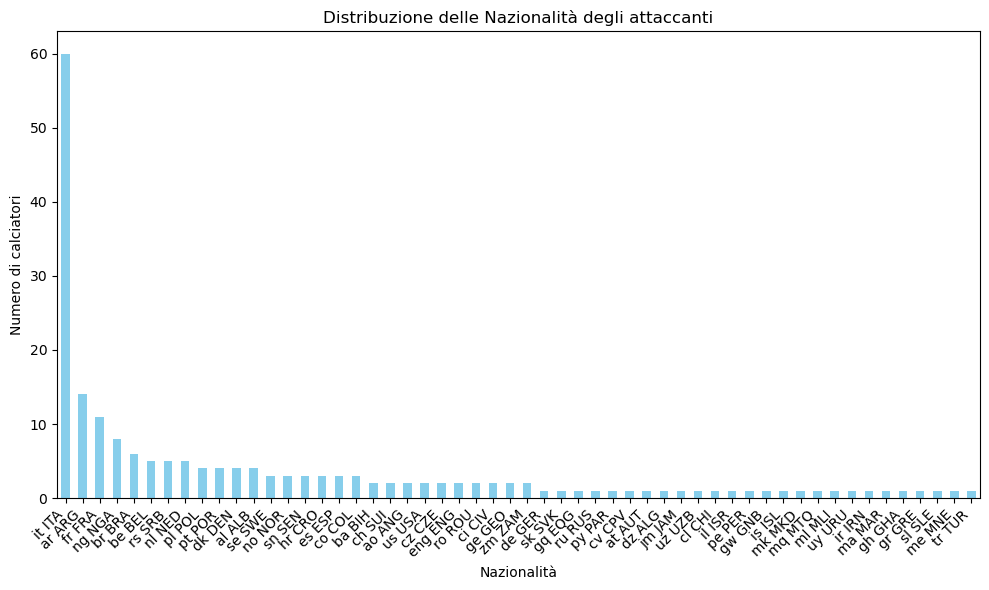

In [33]:
#istogramma nazionalità
nazionalita = data['Nation']

# Conta il numero di calciatori per ciascuna nazionalità
nazionalita_counts = nazionalita.value_counts()

# Crea l'istogramma
fig, ax = plt.subplots(figsize=(10, 6))
nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

# Aggiungi i titoli e le etichette
ax.set_title('Distribuzione delle Nazionalità degli attaccanti')
ax.set_xlabel('Nazionalità')
ax.set_ylabel('Numero di calciatori')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()

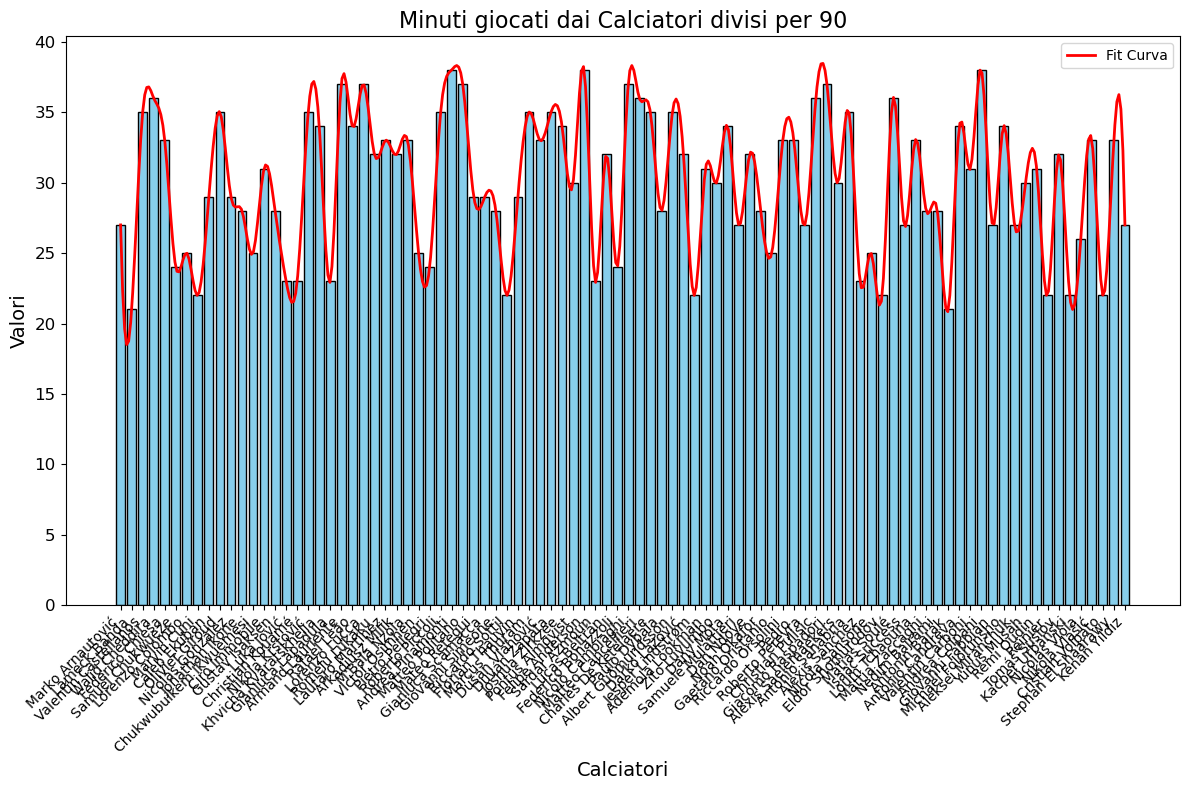

La media risulta: 29.98913043478261


In [34]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Estrai i dati rilevanti (calciatori e valori nella settima colonna)
calciatori = data['Player']  # Assume che i nomi dei calciatori siano nella prima colonna
valori = data['MP']      # Settima colonna partendo da sinistra

filtrato = valori > 20
calciatori_filtrati = calciatori[filtrato]
valori_filtrati = valori[filtrato]

# Crea un istogramma
plt.figure(figsize=(12, 8))
plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

# Ottimizza il layout
plt.xlabel('Calciatori', fontsize=14)
plt.ylabel('Valori', fontsize=14)
plt.title('Minuti giocati dai Calciatori divisi per 90', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Aggiungi una curva di fit
x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

plt.tight_layout()
plt.legend()
plt.show()

media_valori_filtrati = valori_filtrati.mean()

# Mostra il risultato
print("La media risulta:", media_valori_filtrati)

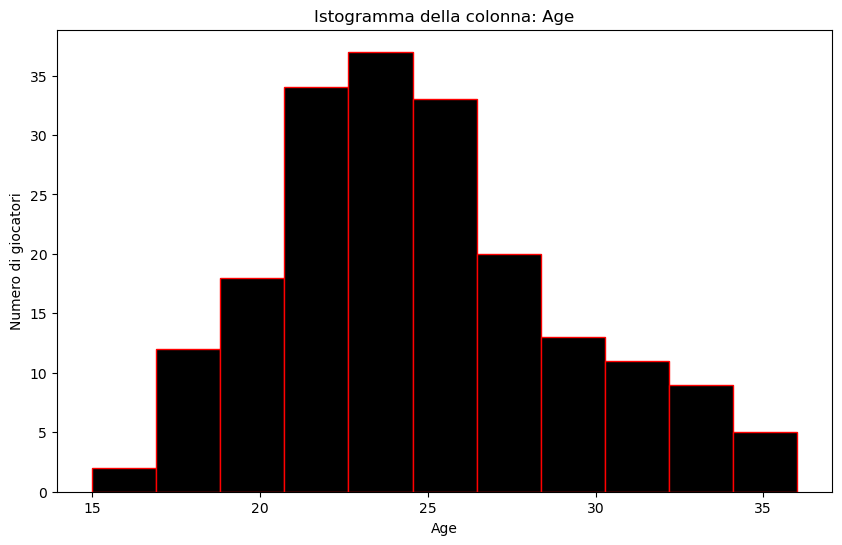

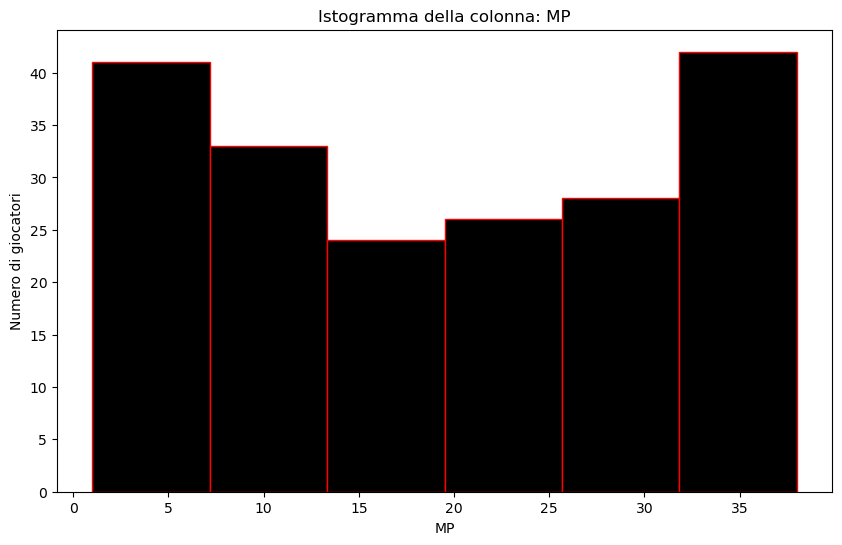

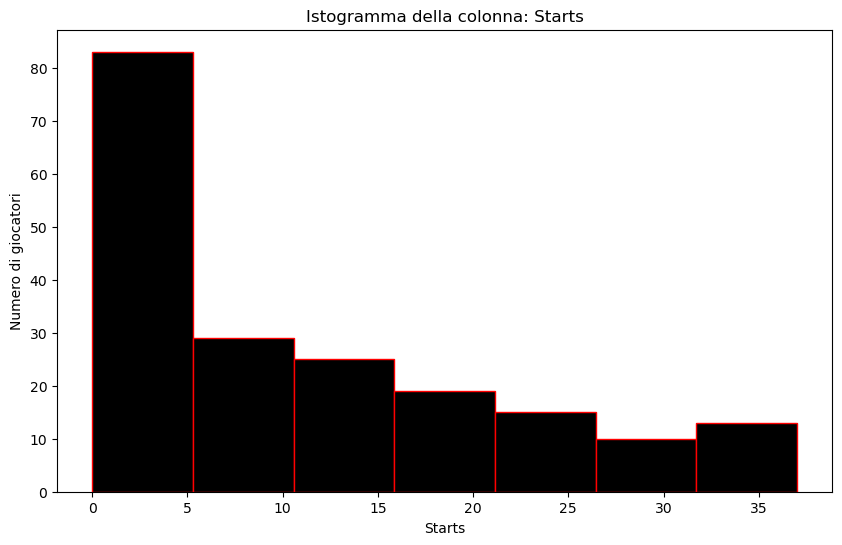

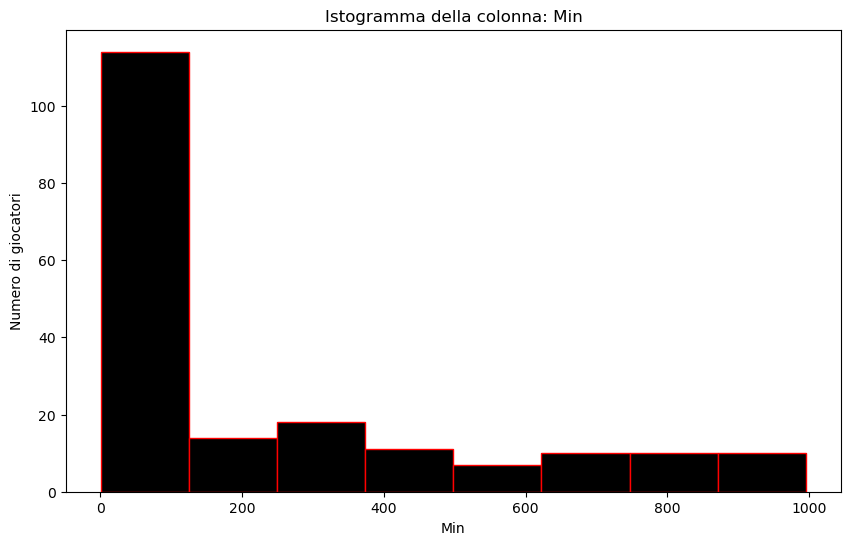

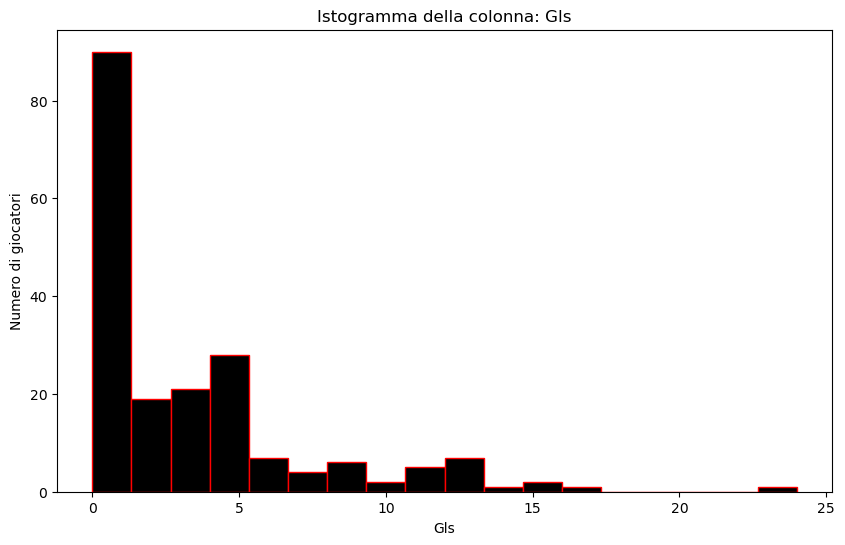

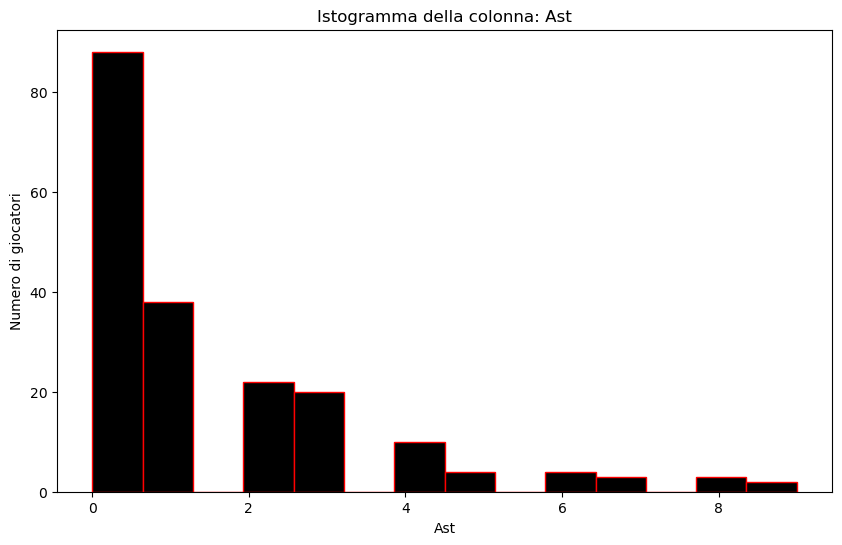

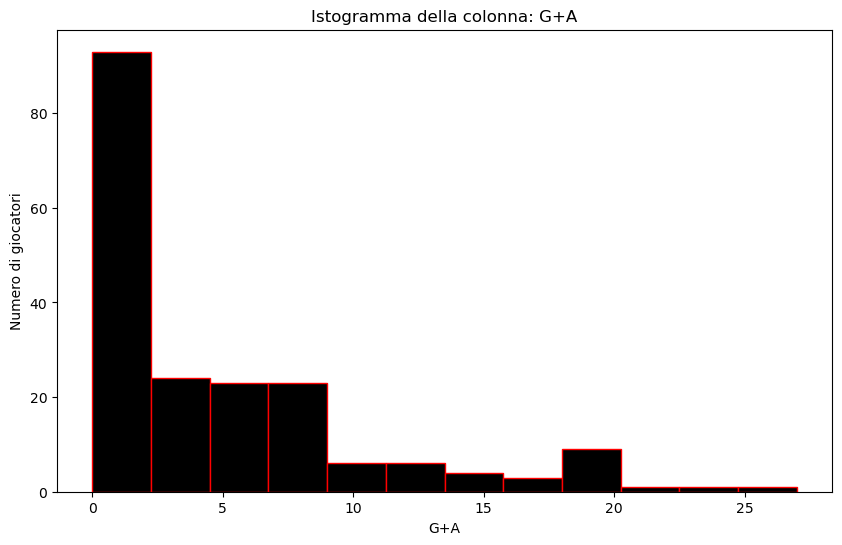

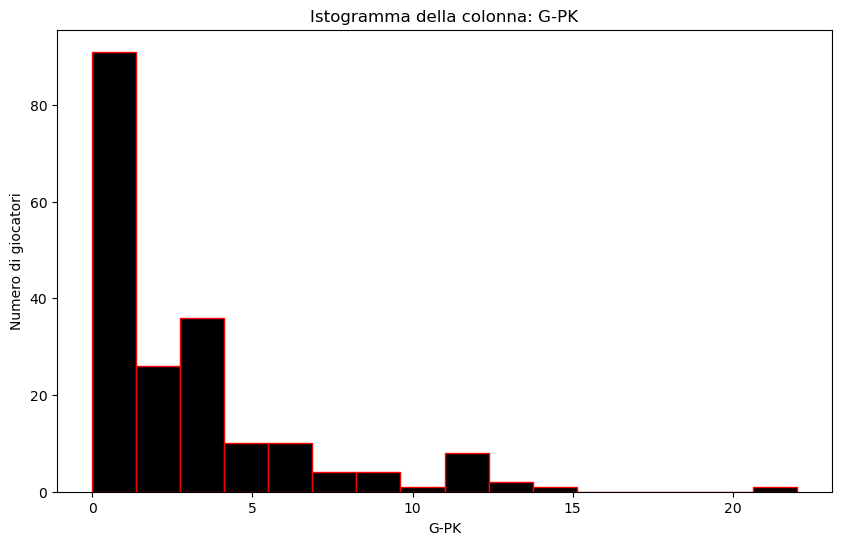

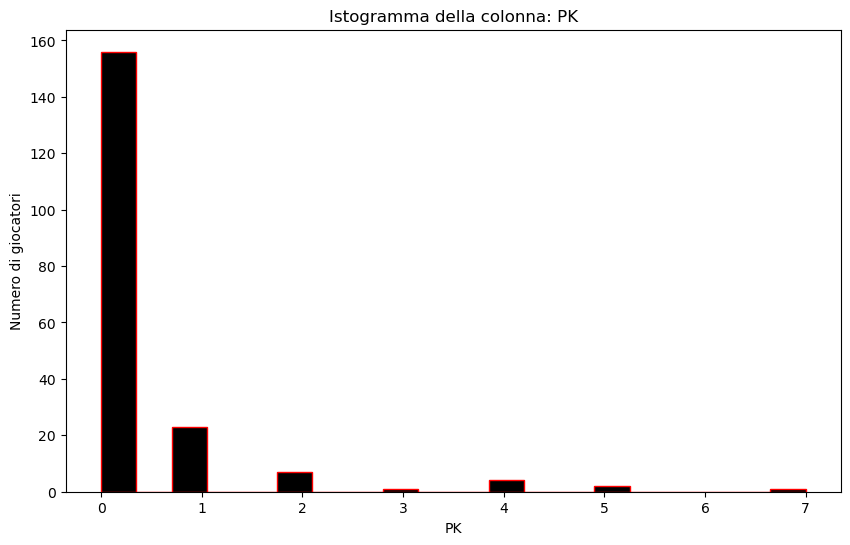

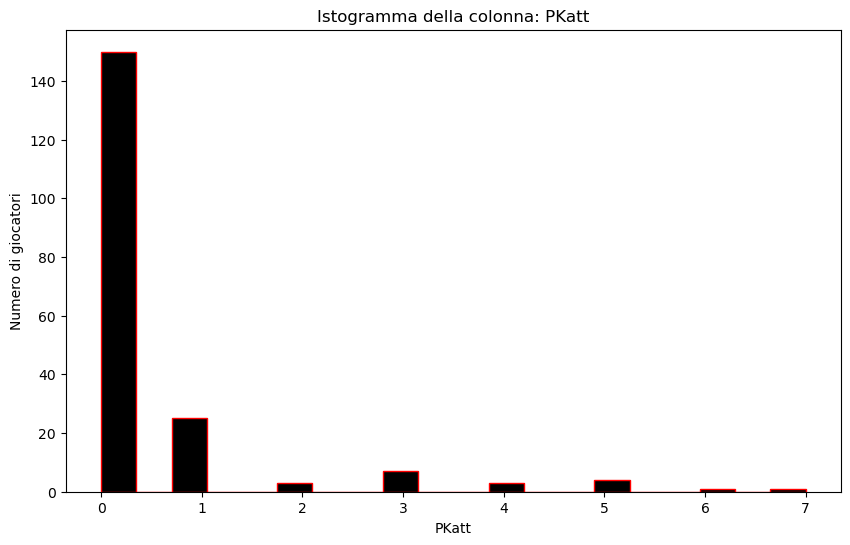

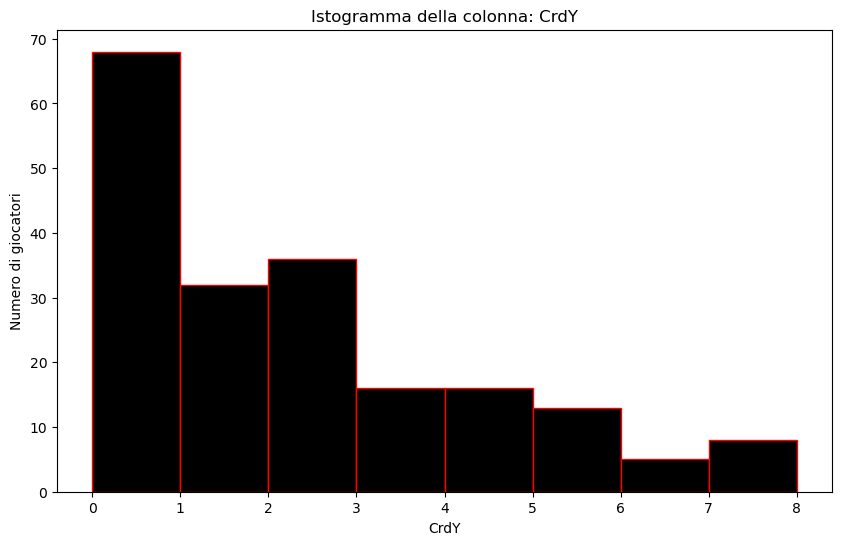

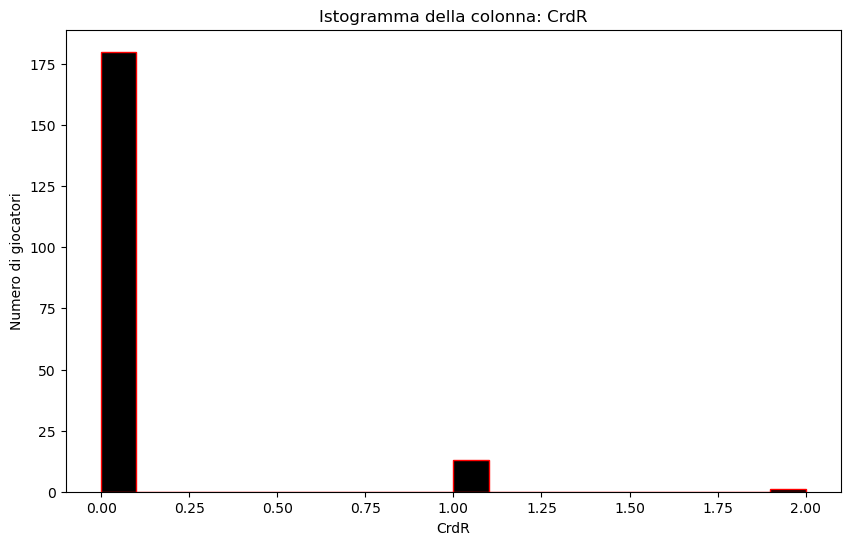

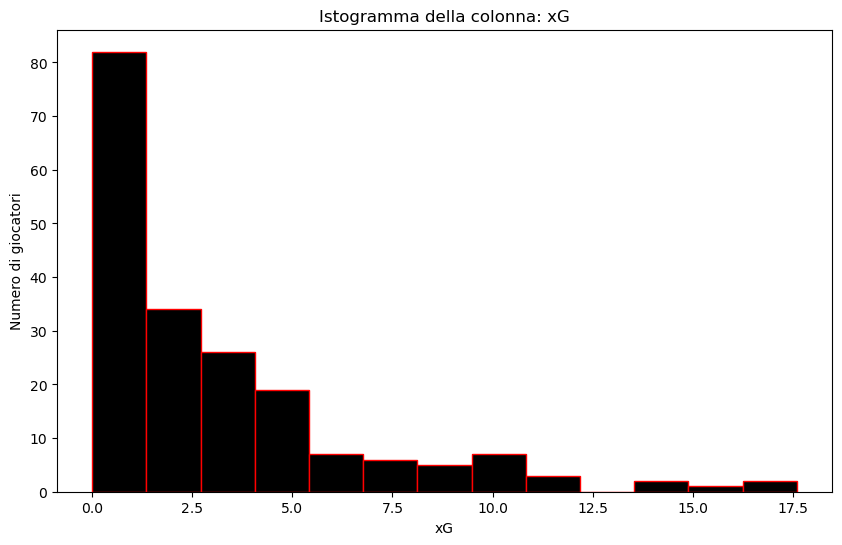

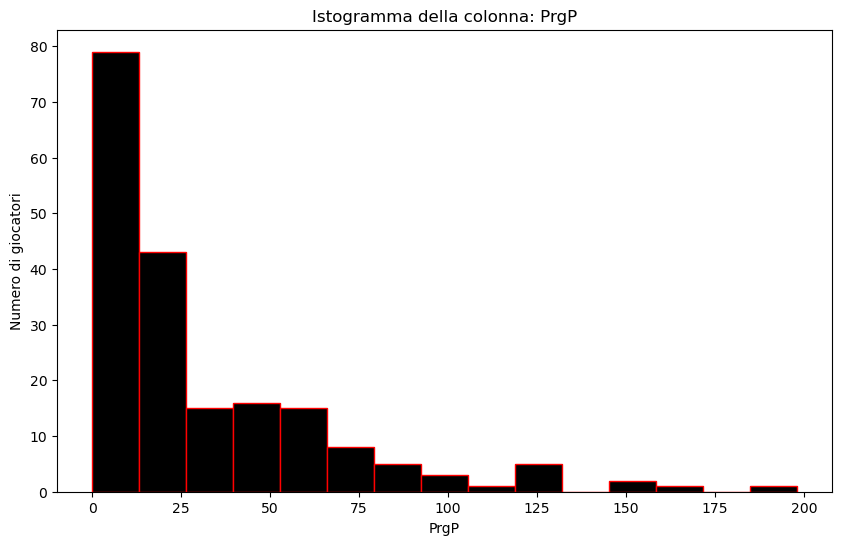

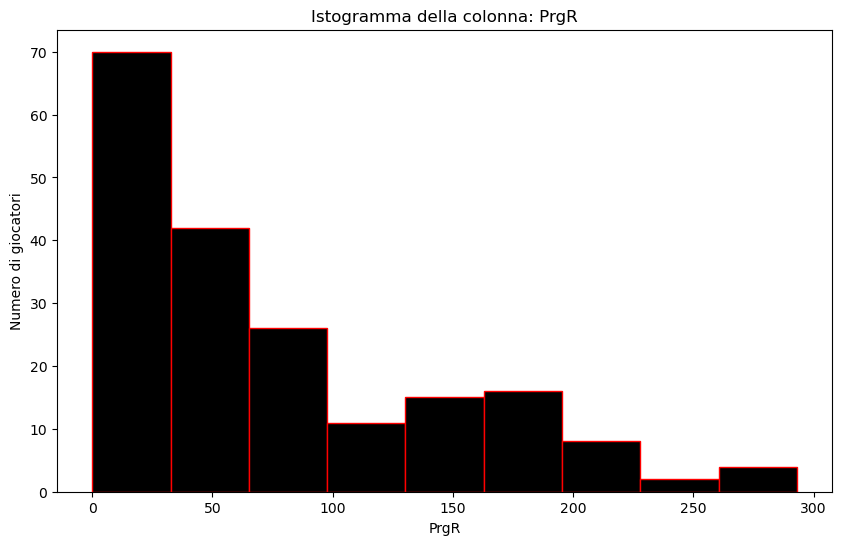

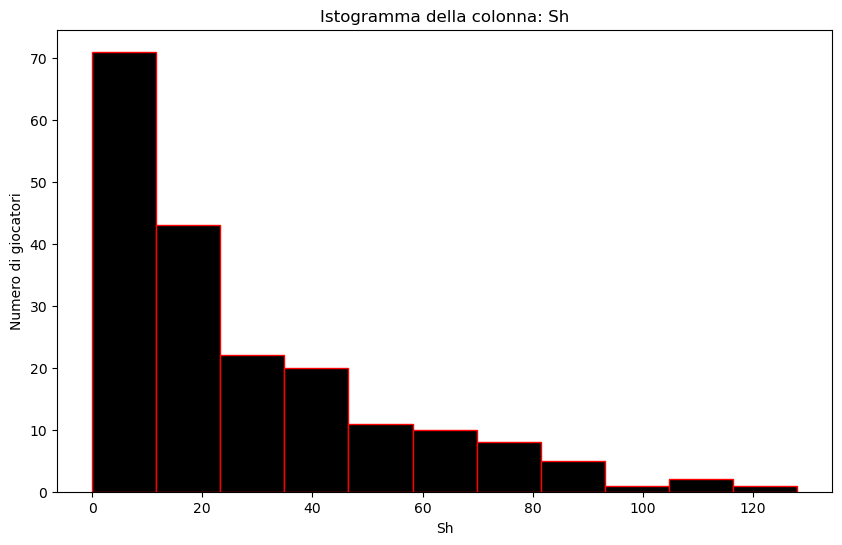

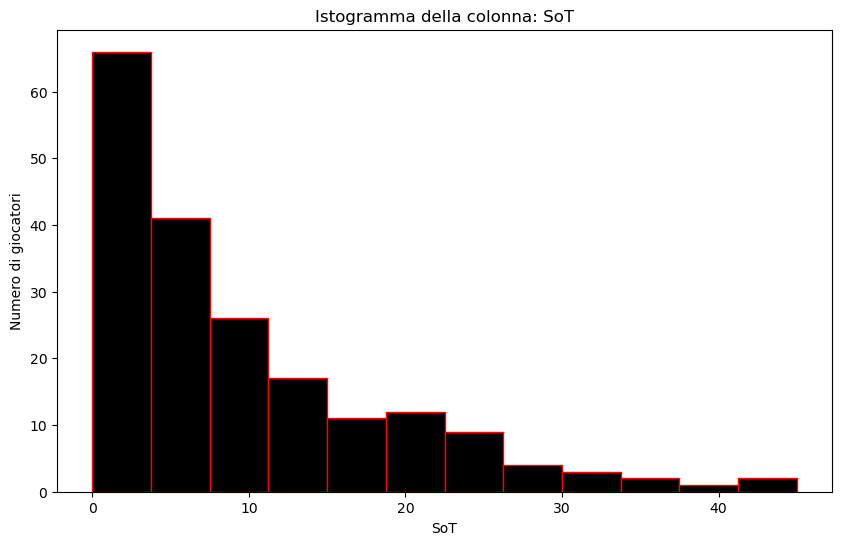

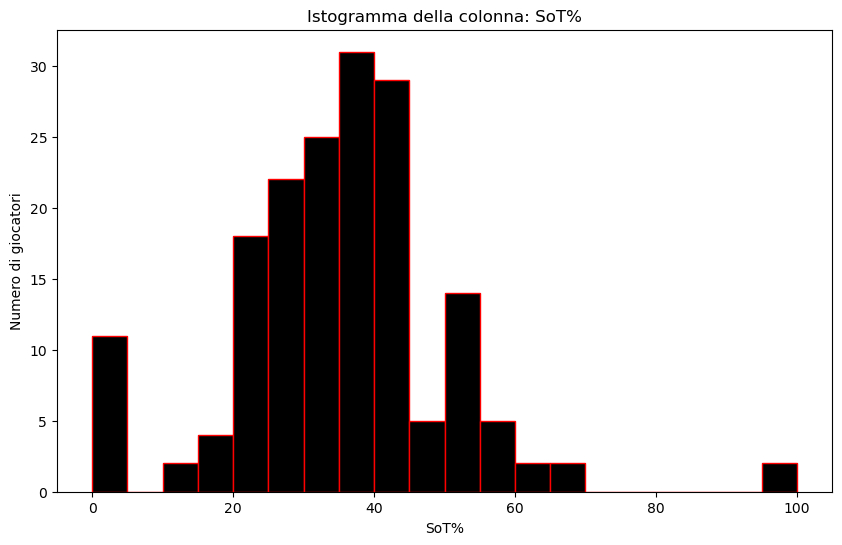

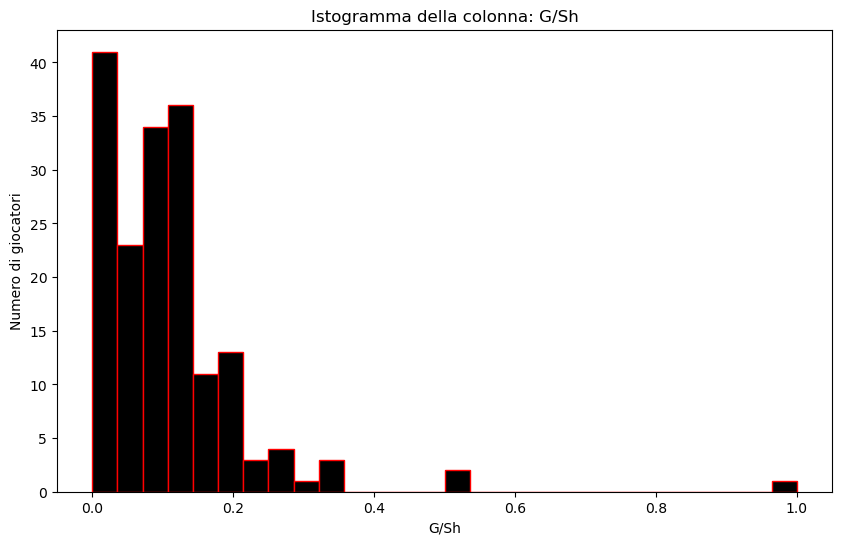

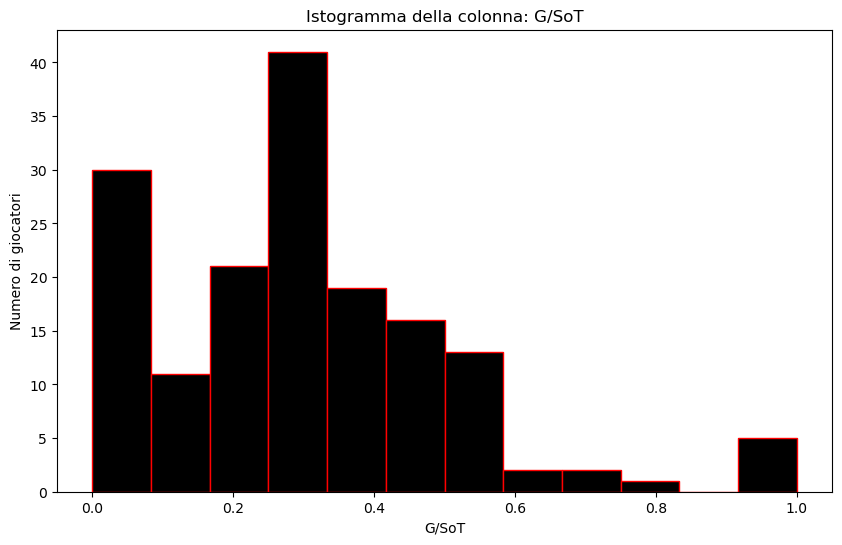

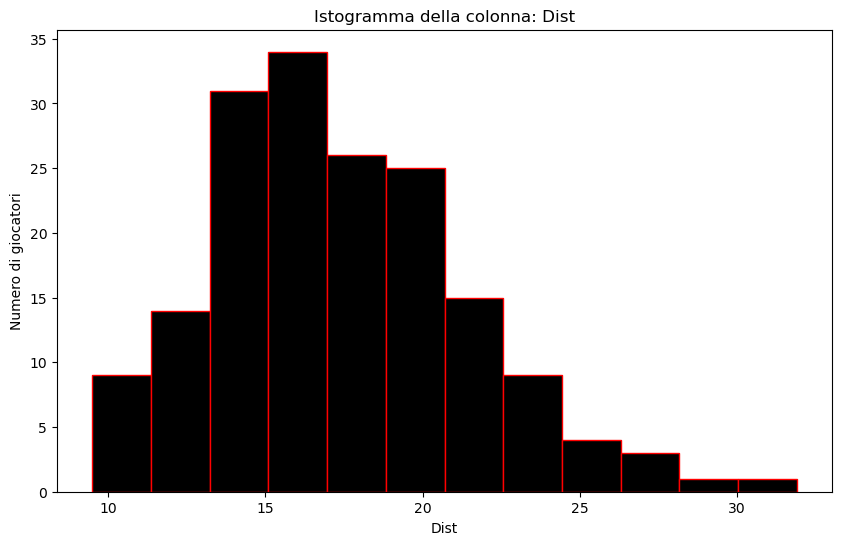

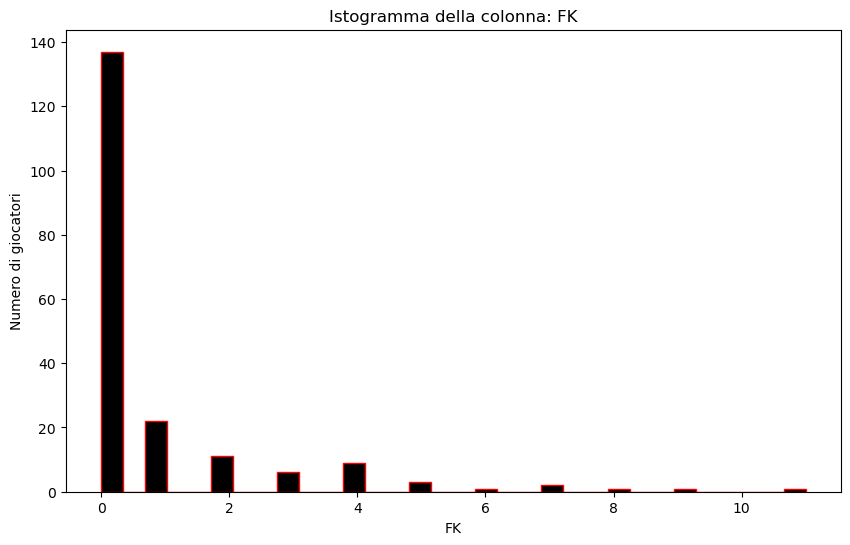

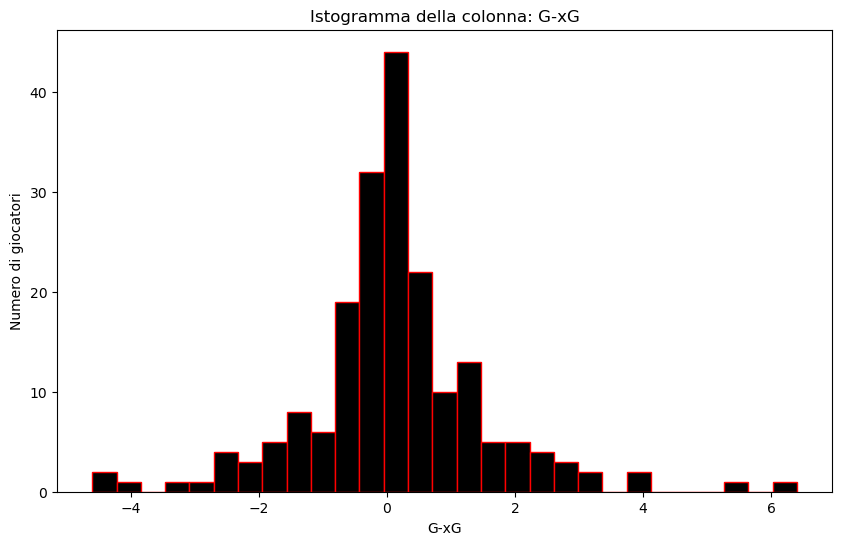

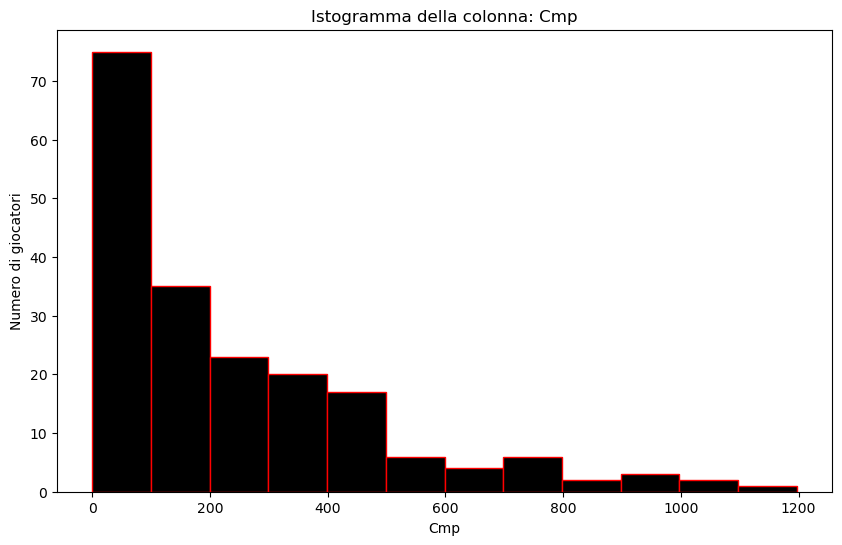

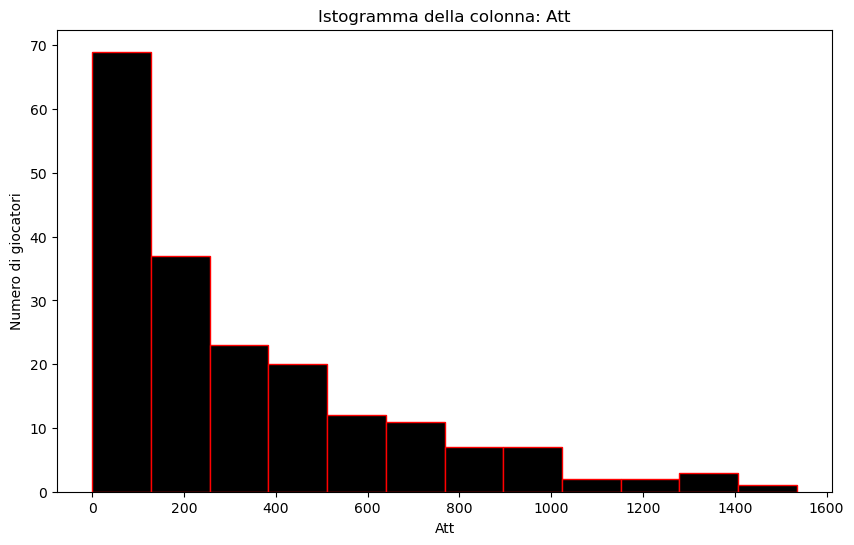

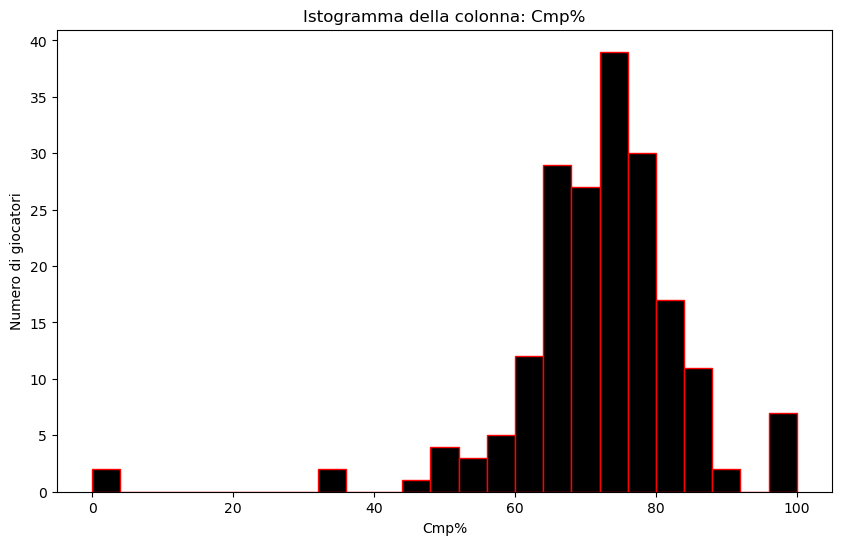

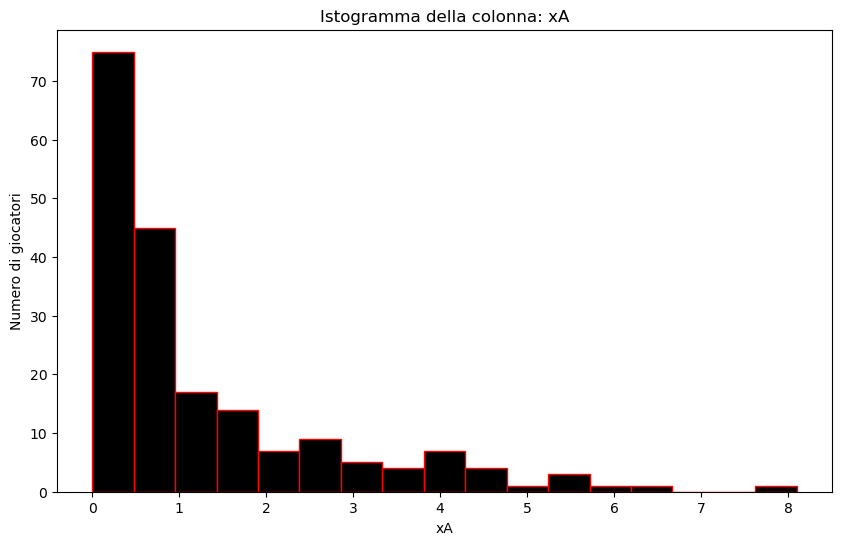

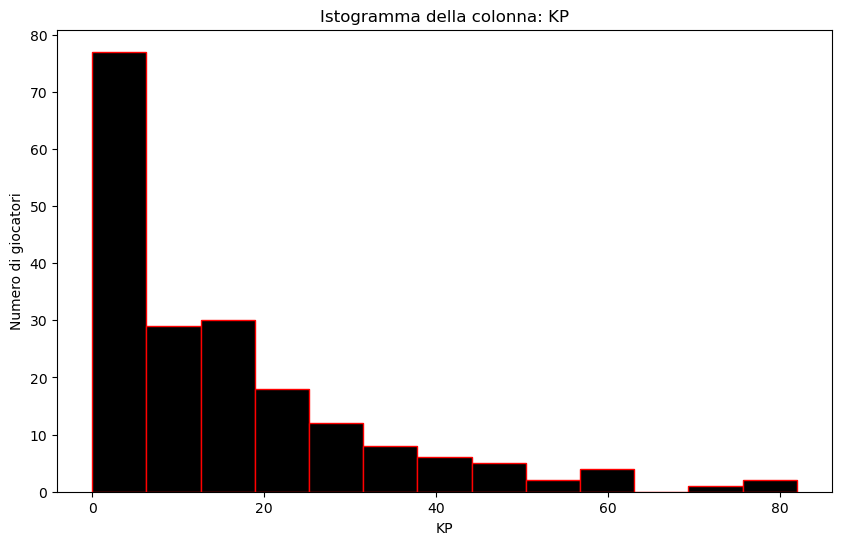

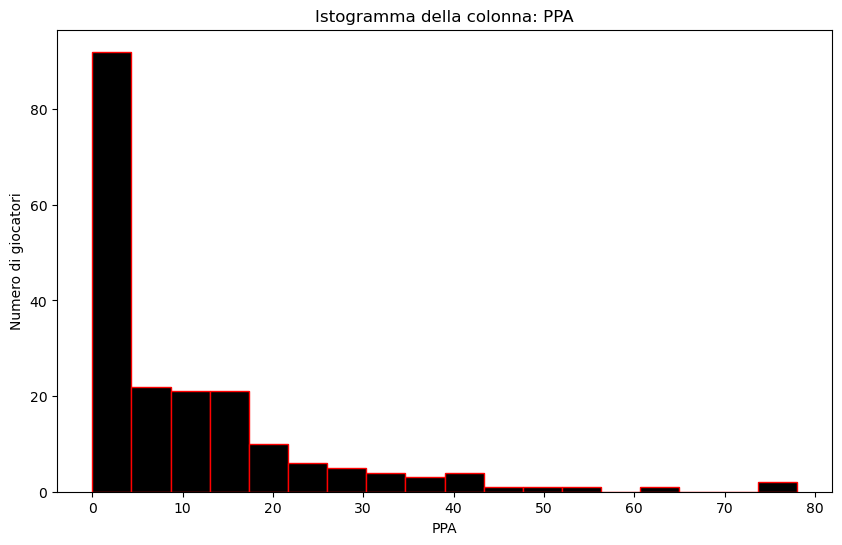

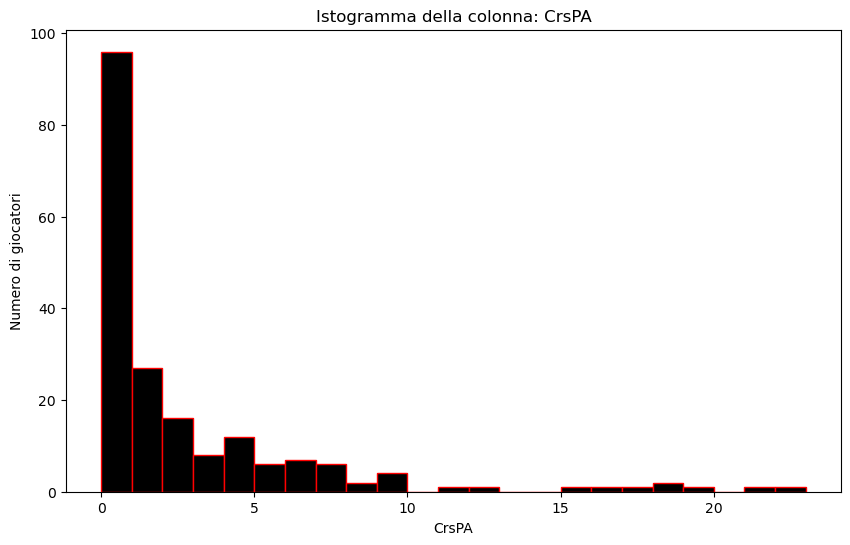

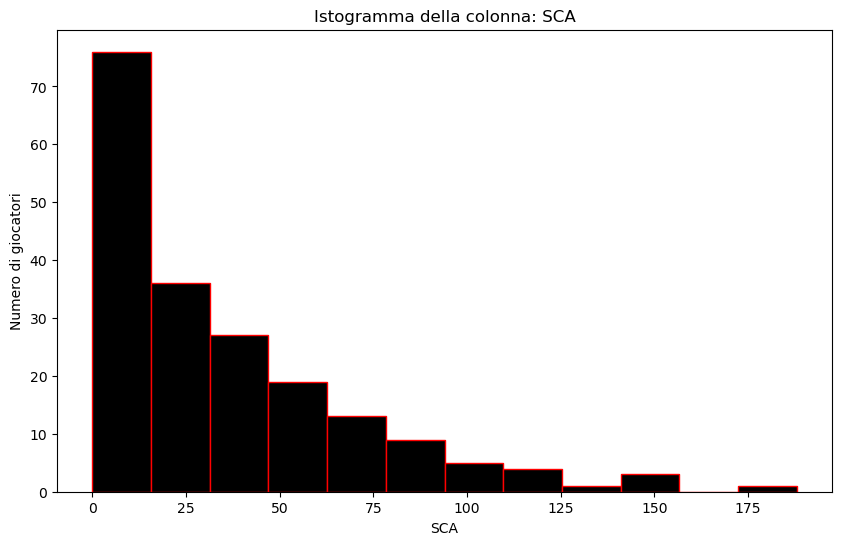

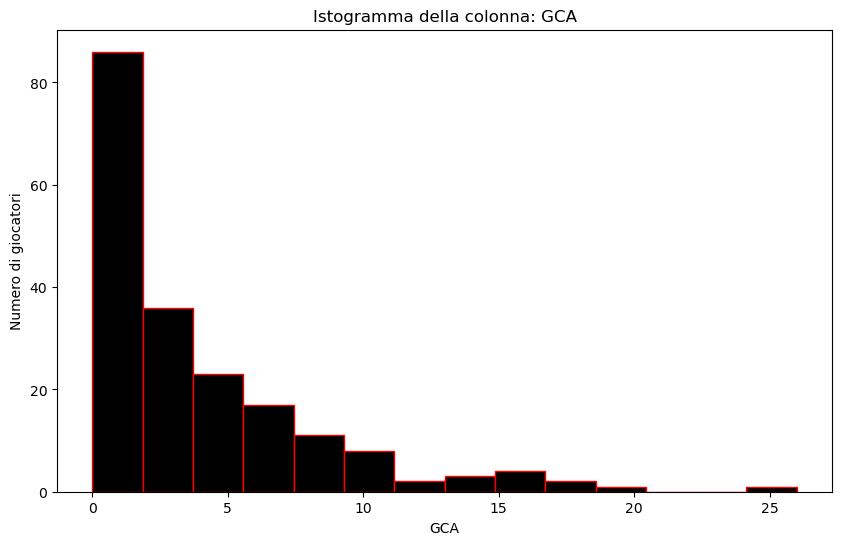

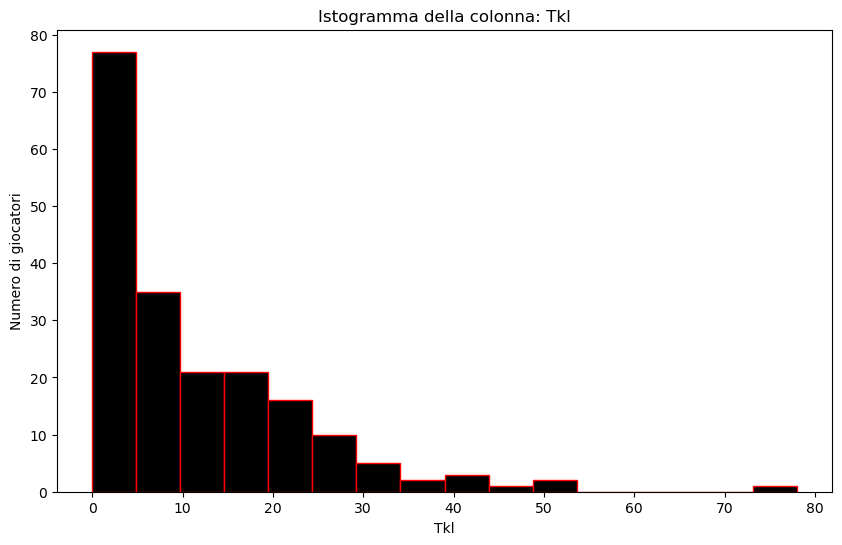

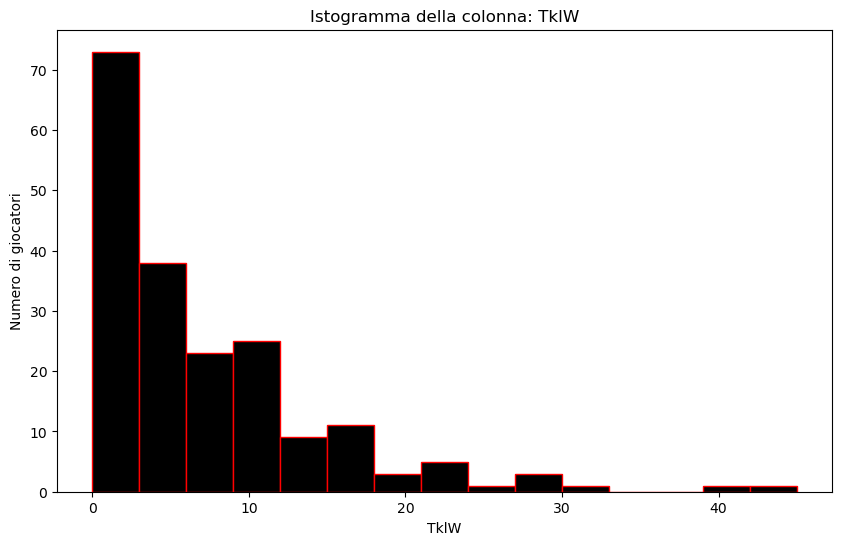

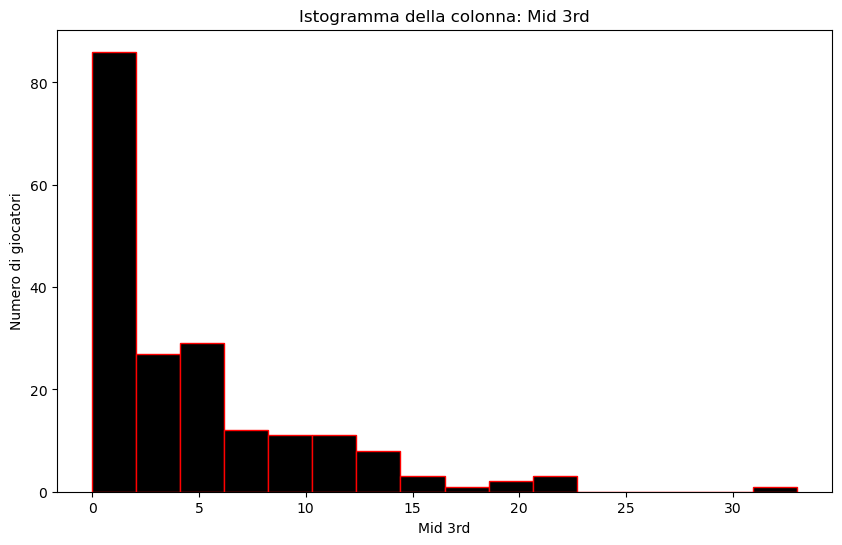

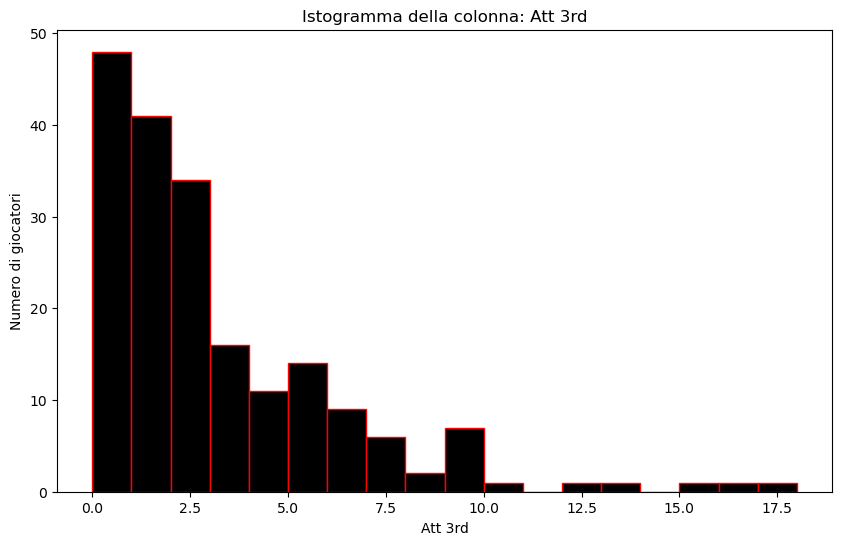

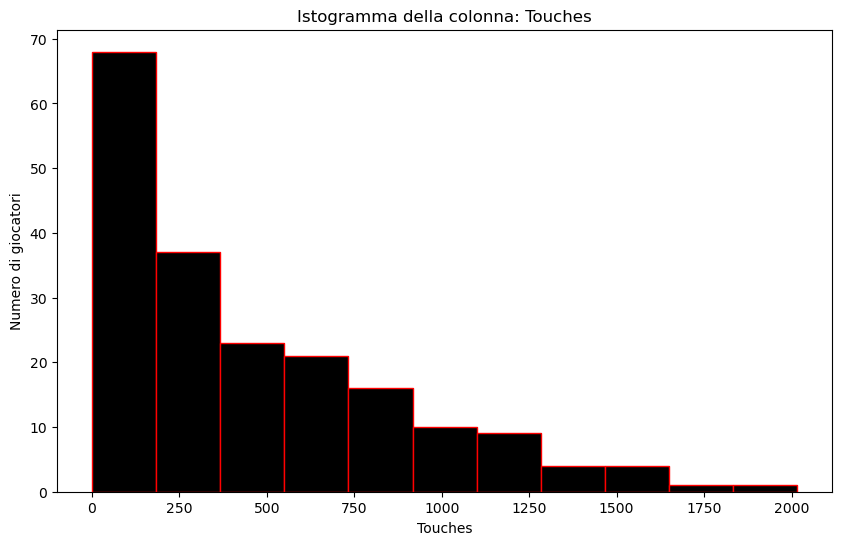

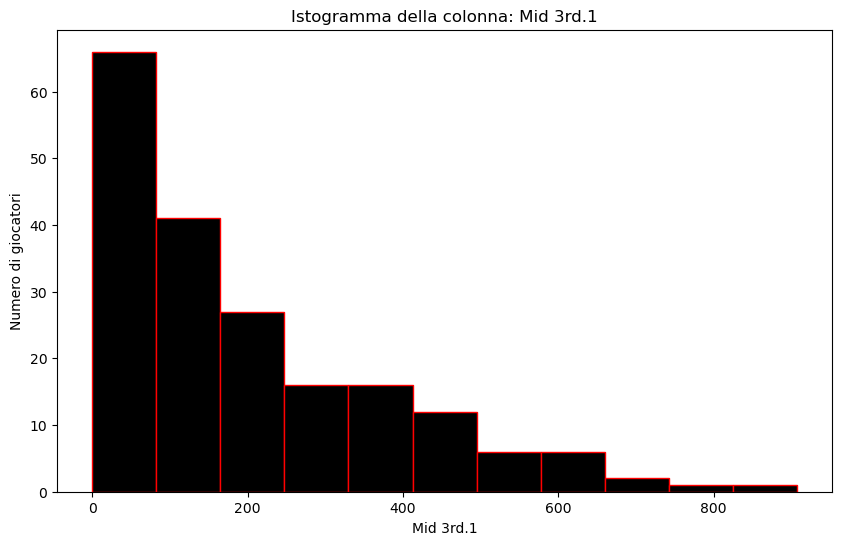

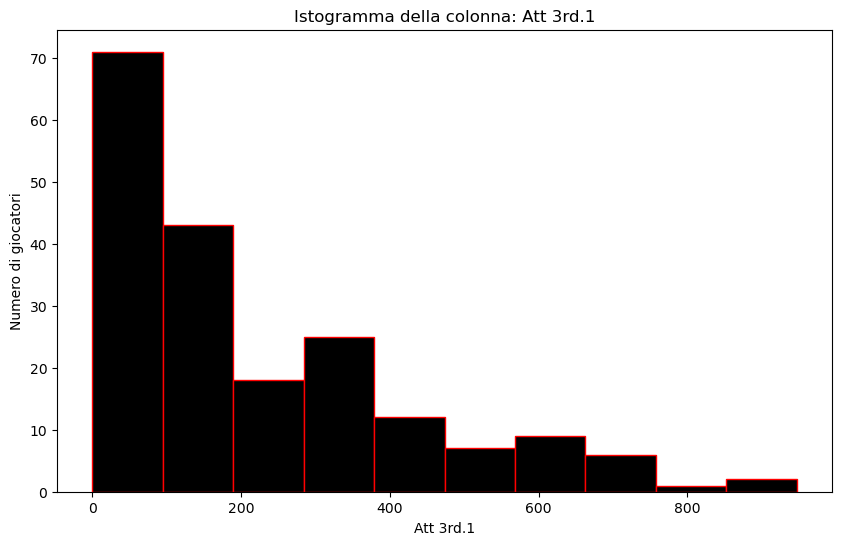

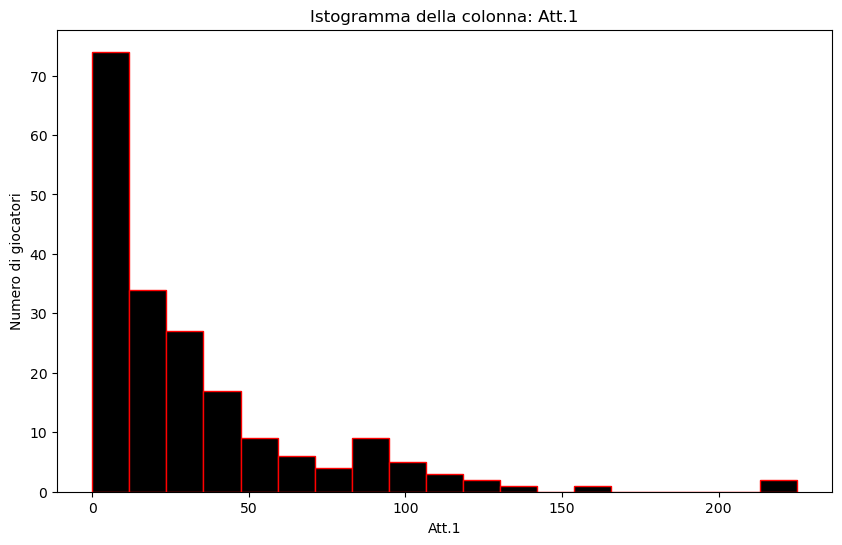

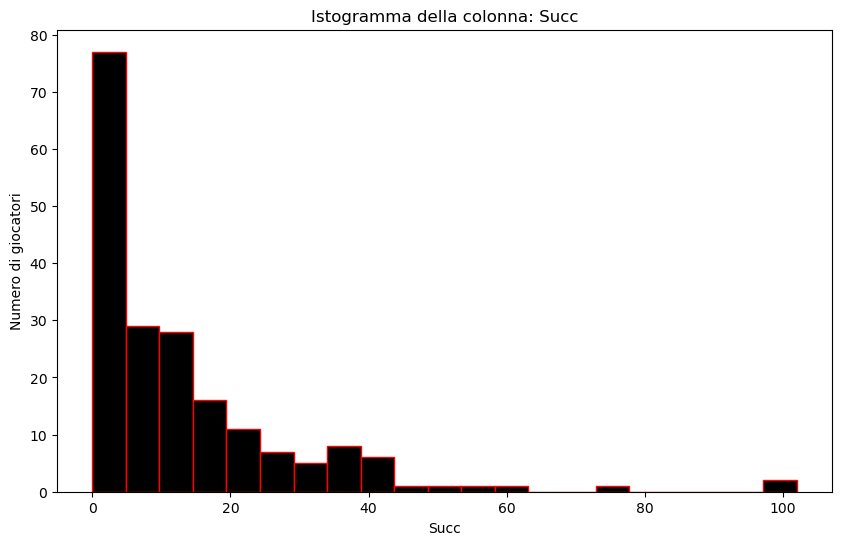

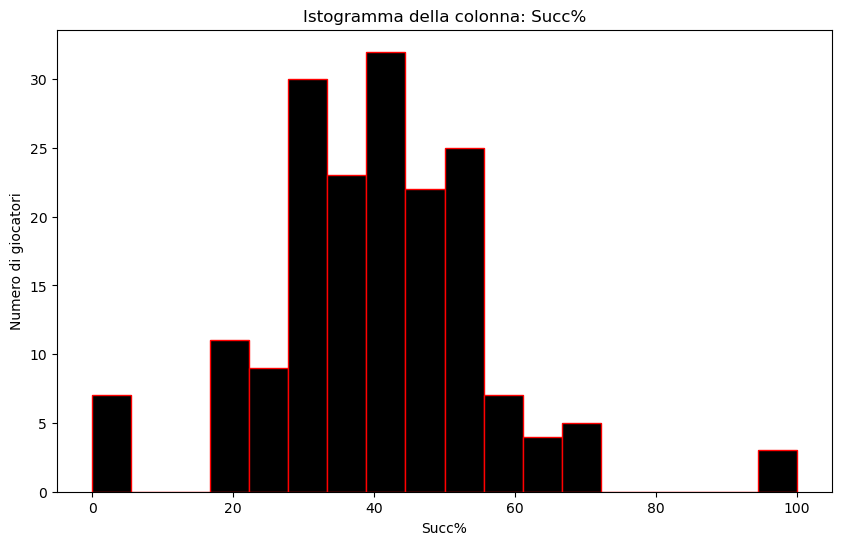

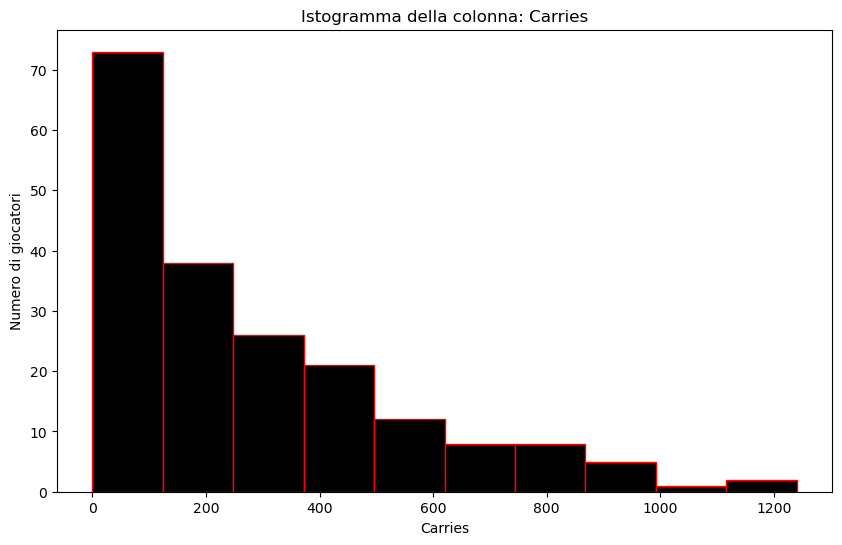

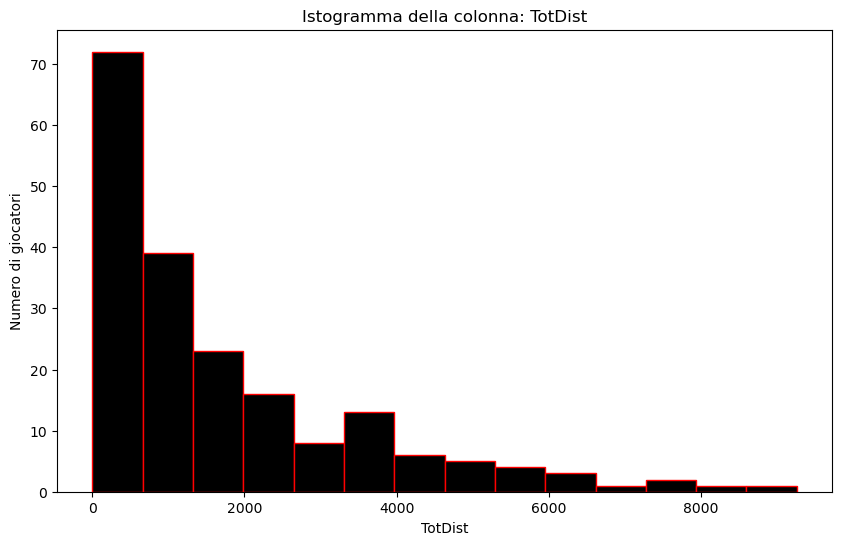

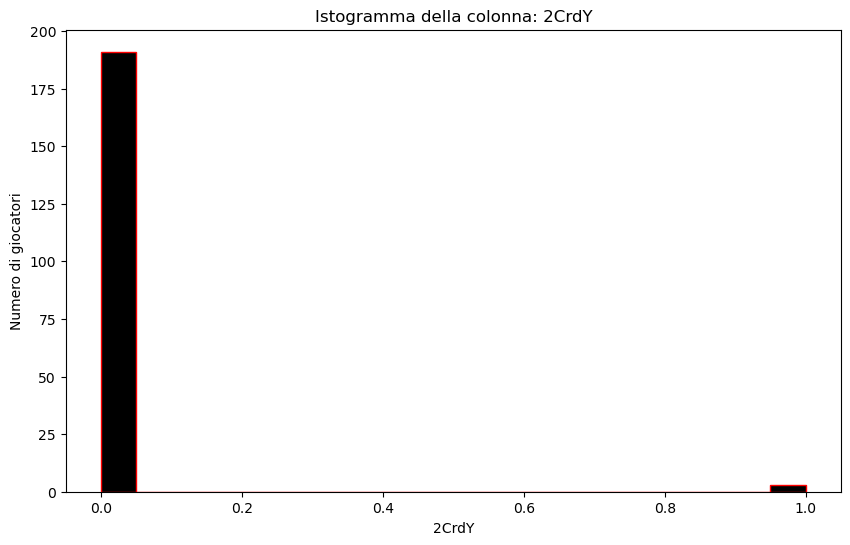

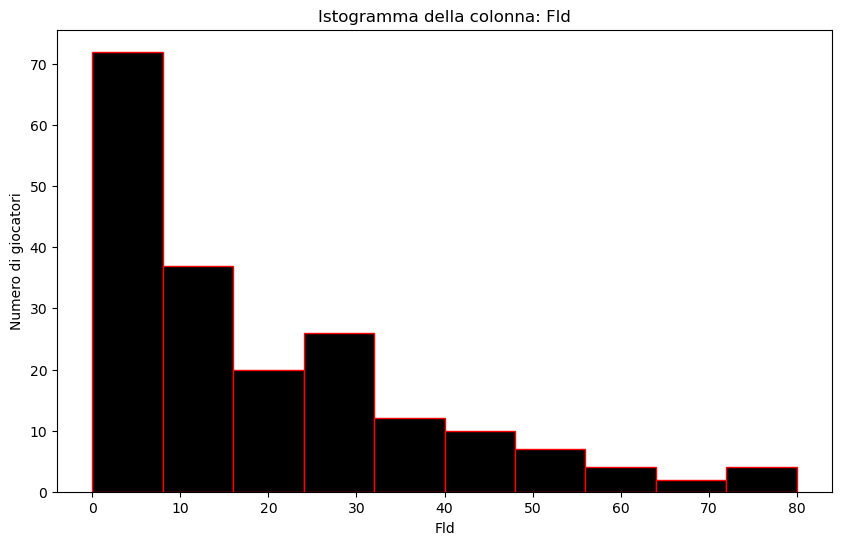

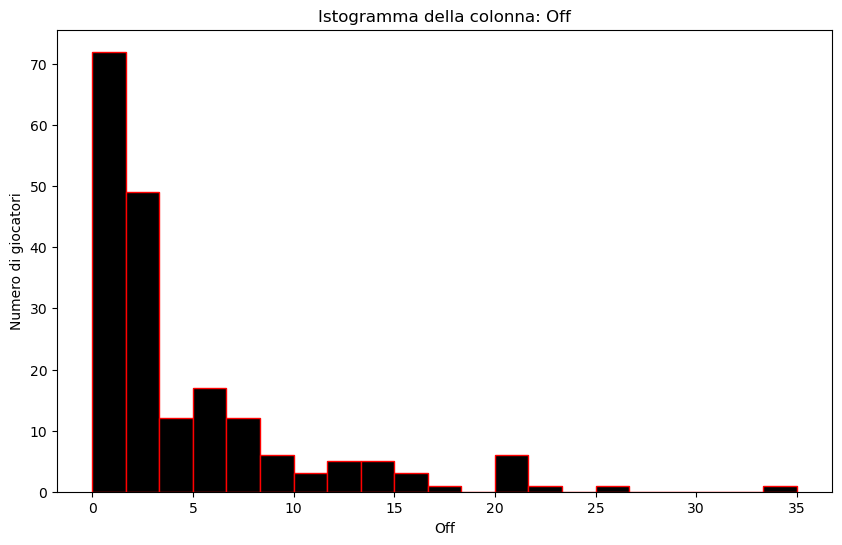

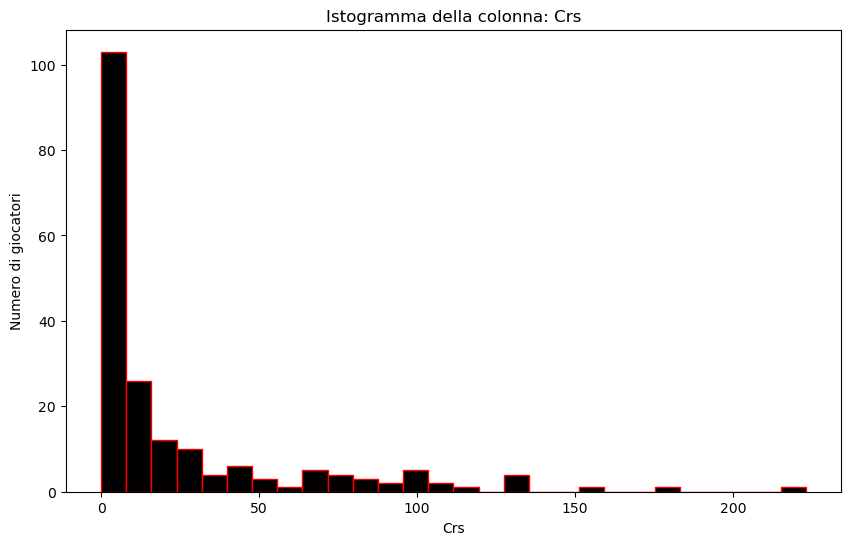

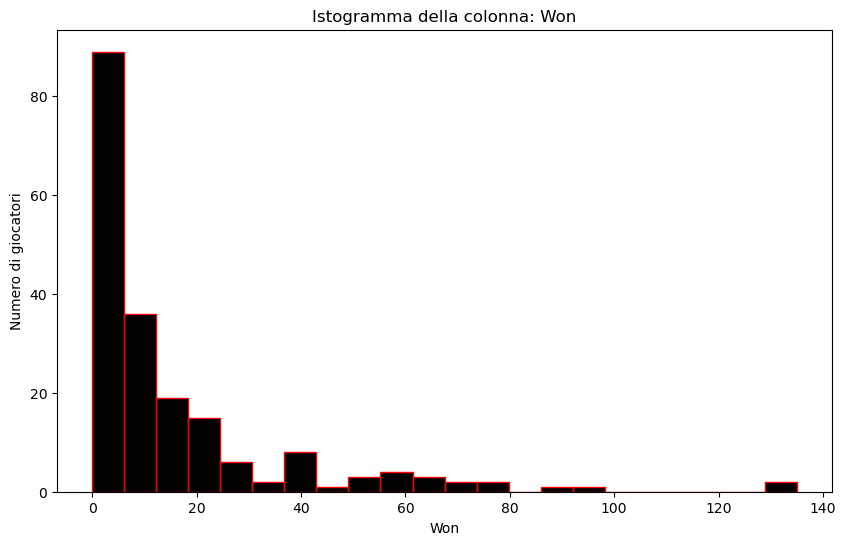

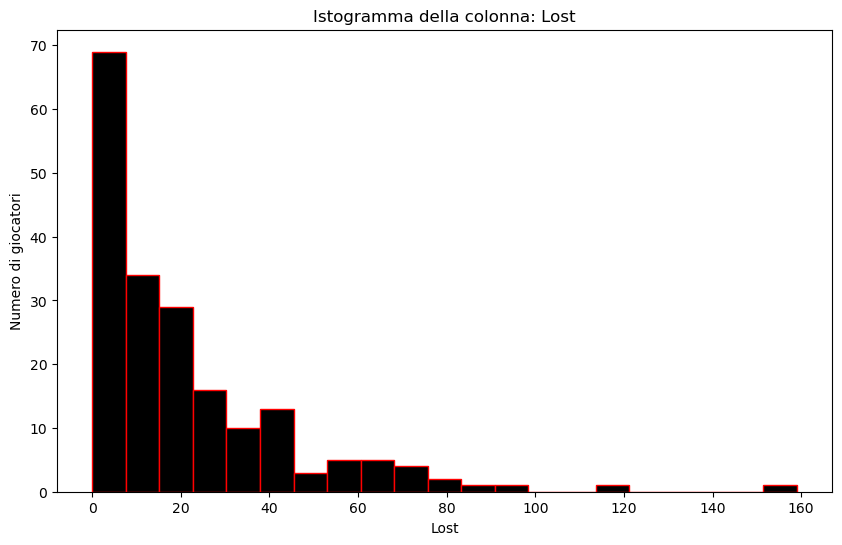

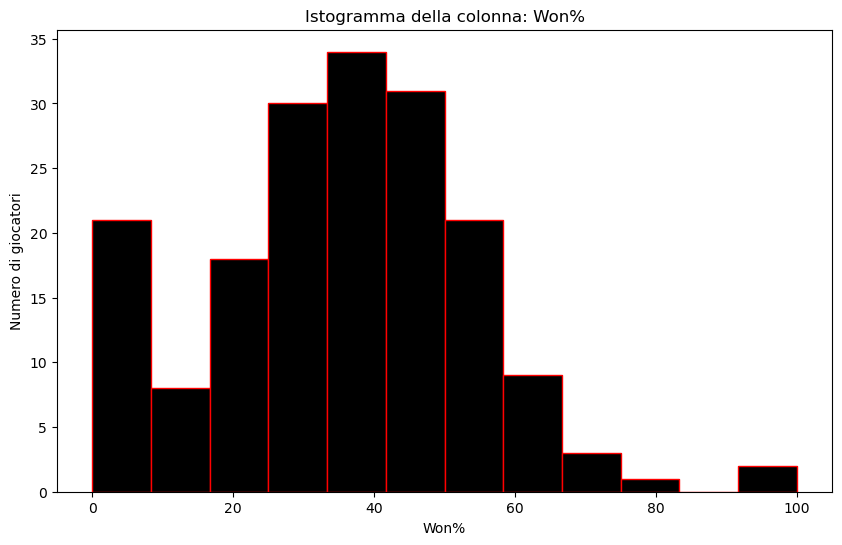

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Carica il file Excel fornito
file_path = 'attaccanti_23.xlsx'  # Modifica il percorso del file se necessario
data = pd.read_excel(file_path)

# Selezionare solo le colonne numeriche
numeric_data = data.select_dtypes(include=[np.number])

# Funzione per calcolare il numero di bin con la regola di Freedman-Diaconis
def freedman_diaconis_bins(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    if iqr == 0:  # Evitare divisioni per zero
        return 20  # Numero di bin di default in caso di IQR nullo
    bin_width = 2 * iqr / (len(data) ** (1 / 3))
    if bin_width == 0:
        return 5  # Numero di bin di default in caso di width troppo piccolo
    return int(np.ceil((data.max() - data.min()) / bin_width))

# Creare istogrammi per ogni colonna numerica con controllo su variazioni minime
for column in numeric_data.columns:
    col_data = numeric_data[column].dropna()  # Rimuovi eventuali valori NaN
    if col_data.empty or col_data.max() == col_data.min():
        continue
    
    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    bins = freedman_diaconis_bins(col_data)
    
    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor = 'r', label='Dati')

    # Titolo e etichette
    plt.title(f'Istogramma della colonna: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Numero di giocatori')

    # Mostrare il grafico
    plt.show()

In [36]:
def istogramma(statistica):
    # Seleziona la colonna specificata
    col_data = data[statistica].dropna()  # Rimuovi eventuali valori NaN

    if col_data.empty or col_data.max() == col_data.min():
        print(f"La colonna '{statistica}' non ha abbastanza variabilità per creare un istogramma.")
        return

    # Calcolare il numero di bin con la regola di Freedman-Diaconis
    def freedman_diaconis_bins(data):
        q25, q75 = np.percentile(data, [25, 75])
        iqr = q75 - q25
        if iqr == 0:  # Evitare divisioni per zero
            return 20  # Numero di bin di default in caso di IQR nullo
        bin_width = 2 * iqr / (len(data) ** (1 / 3))
        if bin_width == 0:
            return 5  # Numero di bin di default in caso di width troppo piccolo
        return int(np.ceil((data.max() - data.min()) / bin_width))

    # Calcolare il numero di bin
    bins = freedman_diaconis_bins(col_data)

    # Creare l'istogramma
    plt.figure(figsize=(10, 6))
    plt.hist(col_data, bins=bins, density=False, color='k', edgecolor='r', label='Dati')

    # Titolo e etichette
    plt.title(f'Istogramma della colonna: {statistica}')
    plt.xlabel(f'{statistica}')
    plt.ylabel('Numero di giocatori')

    # Mostrare il grafico in una finestra separata
    plt.show()

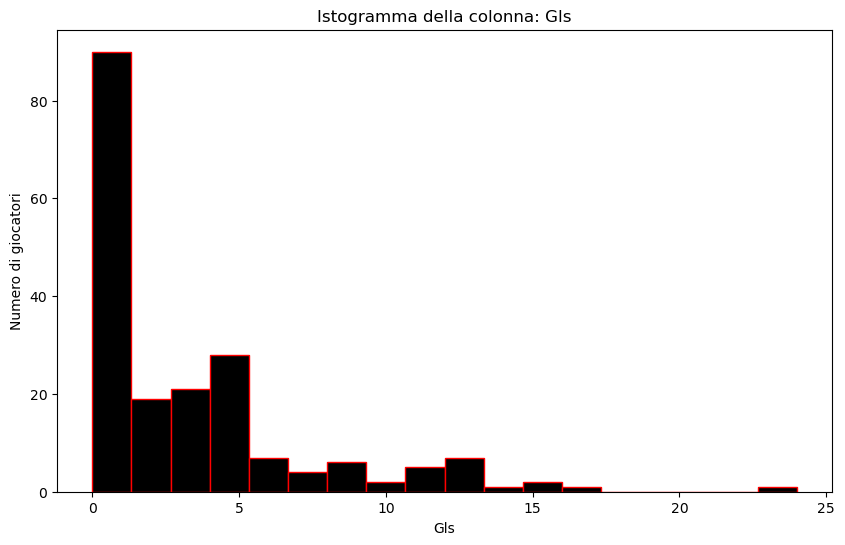

In [37]:
statistica = 'Gls'
istogramma(statistica)